# Breast Cancer Project

## Import Library

In [4]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px

#default theme
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [5]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

## Load and Analys Data

In [6]:
od.download('https://www.kaggle.com/uciml/breast-cancer-wisconsin-data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dharmeshvishwakarma
Your Kaggle Key: ········


100%|█████████████████████████████████████| 48.6k/48.6k [00:00<00:00, 1.11MB/s]

In [7]:
train = pd.read_csv('breast-cancer-wisconsin-data/data.csv')
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##### like we see all our feautres are numirical values exept the target value ***diagnosis*** (M = malignant, B = benign)

In [9]:
train.shape

(569, 33)

##### we had 569 Rows and 33 columns (small data )

In [10]:
train.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


#### from the first look in our data description we can see that :

1. B = benign is the most frequent value in our target columns
2. Unnamed: 32 columns is an empty column 

### Finding Missing Values

In [11]:
missing_values=train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
id,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0


##### like we c our data is clean exept the last columns that is empty so we gonna drop it 

In [12]:
train=train.drop('Unnamed: 32',axis=1)
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Feautres Selection 

In [13]:
# drop the id columns
train=train.drop('id',axis=1)

In [14]:
# transformation of type of the target value to numerical 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train.diagnosis = le.fit_transform(train.diagnosis)
train.diagnosis


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

#### Diagnosis 

1. M = malignant ==> 1
2. B = benign    ==> 0 

## Correlation Map

In [15]:
train.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,0.33,-0.01,0.57,-0.01,0.56,0.55,-0.07,0.29,0.25,0.41,-0.01,0.08,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,0.68,-0.10,0.67,0.74,-0.22,0.21,0.19,0.38,-0.10,-0.04,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,0.28,0.39,0.28,0.26,0.01,0.19,0.14,0.16,0.01,0.05,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,0.69,-0.09,0.69,0.74,-0.20,0.25,0.23,0.41,-0.08,-0.01,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,0.73,-0.07,0.73,0.80,-0.17,0.21,0.21,0.37,-0.07,-0.02,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,0.30,0.07,0.30,0.25,0.33,0.32,0.25,0.38,0.20,0.28,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,0.50,0.05,0.55,0.46,0.14,0.74,0.57,0.64,0.23,0.51,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,0.63,0.08,0.66,0.62,0.10,0.67,0.69,0.68,0.18,0.45,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,0.70,0.02,0.71,0.69,0.03,0.49,0.44,0.62,0.10,0.26,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.33,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,0.30,0.13,0.31,0.22,0.19,0.42,0.34,0.39,0.45,0.33,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44


#### this feautres had a corralation valus < 0.07 with the target columns 
fractal_dimension_mean / texture_se / smoothness_se / symmetry_se / fractal_dimension_se

In [16]:
# drop this columns 
train=train.drop(['fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se'],axis=1)

[0.05028978 0.02329201 0.06491315 0.05069851 0.01083903 0.01929025
 0.08128954 0.07934025 0.00657998 0.01462878 0.02125695 0.03869405
 0.0081606  0.01266436 0.00847505 0.09301979 0.0305151  0.09427574
 0.05818636 0.01831062 0.02451839 0.06513277 0.10115763 0.01546554
 0.00900575]


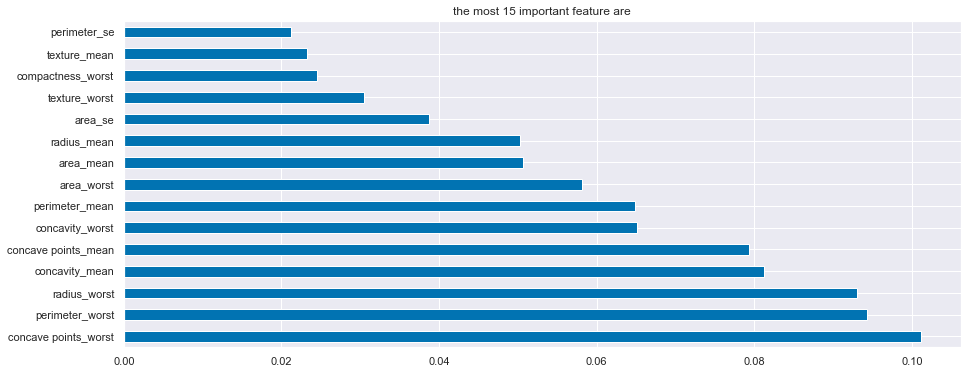

In [17]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = train.drop('diagnosis',axis=1)
y = train.diagnosis

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('the most 15 important feature are')
plt.show()

In [18]:
train.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [19]:
train=train.drop(['texture_mean','smoothness_mean','compactness_mean','symmetry_mean','perimeter_se','compactness_se','concavity_se','concave points_se','smoothness_worst','symmetry_worst','fractal_dimension_worst'],axis=1)

## Data Vizualisation

### a) concave points_worst

<AxesSubplot:xlabel='concave points_worst'>

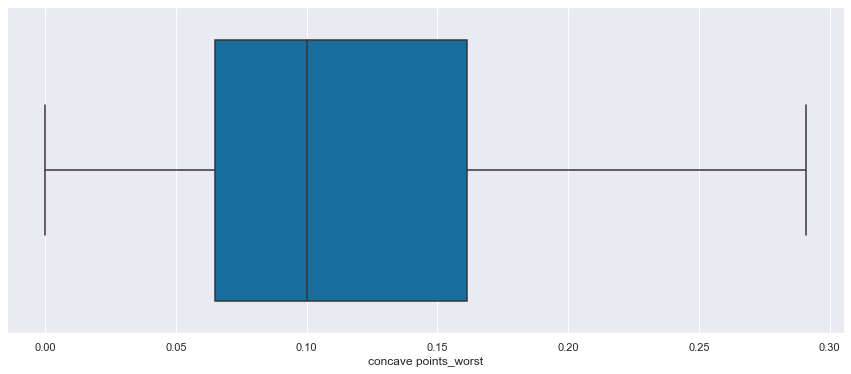

In [22]:
sns.boxplot(x=train['concave points_worst'])

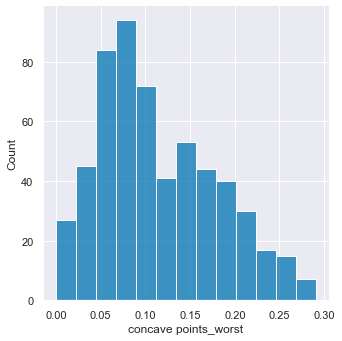

In [23]:
sns.displot(train, x='concave points_worst')

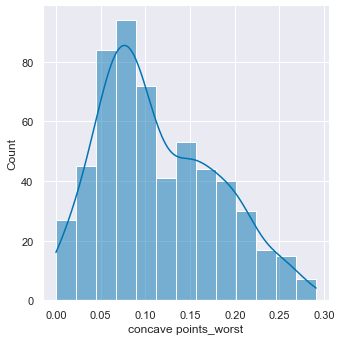

In [24]:
sns.displot(train, x="concave points_worst", kde=True)

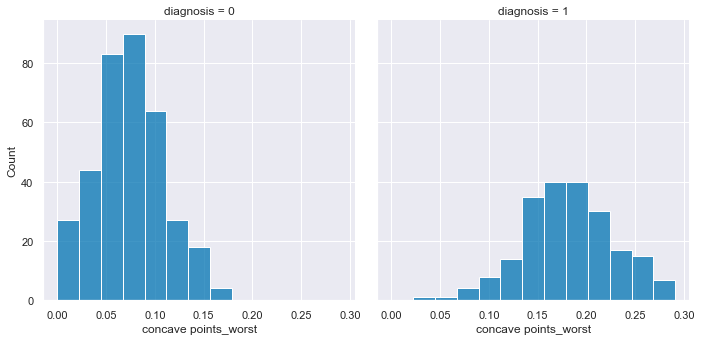

In [25]:
sns.displot(train, x="concave points_worst", col="diagnosis", multiple="dodge")

### b) concavity_mean

<AxesSubplot:xlabel='concavity_mean'>

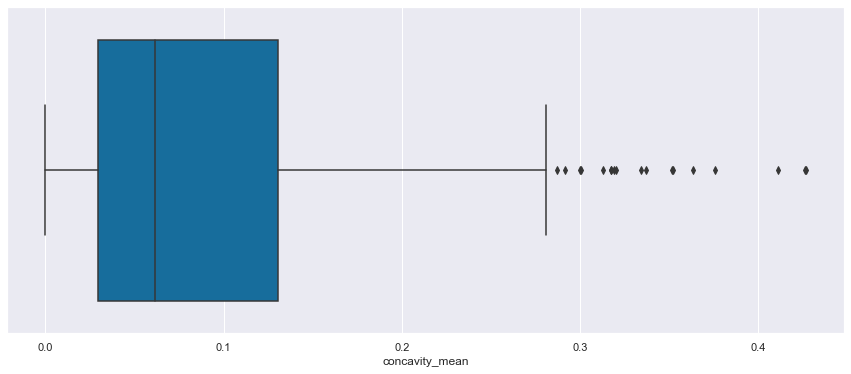

In [26]:
sns.boxplot(x=train['concavity_mean'])

We can see there are some outliers. Lets remove them (0.3- 0.5)

In [27]:
outlier=train[train['concavity_mean']>=0.25]
outlier

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.990,122.80,1001.0,0.3001,0.14710,1.0950,153.40,25.38,17.33,184.60,2019.0,0.6656,0.7119,0.2654
68,0,9.029,58.79,250.5,0.3130,0.04375,0.3274,17.67,10.31,22.65,65.50,324.7,0.4365,1.2520,0.1750
78,1,20.180,143.70,1245.0,0.3754,0.16040,0.9317,116.40,23.37,31.72,170.30,1623.0,0.6164,0.7681,0.2508
82,1,25.220,171.50,1878.0,0.3339,0.18450,0.8973,120.00,30.00,33.62,211.70,2562.0,0.6076,0.6476,0.2867
108,1,22.270,152.80,1509.0,0.4264,0.18230,1.2150,170.00,28.40,28.01,206.80,2360.0,0.6997,0.9608,0.2910
112,0,14.260,97.83,629.9,0.3003,0.07798,0.3628,29.25,15.30,23.73,107.00,709.0,0.4193,0.6783,0.1505
122,1,24.250,166.20,1761.0,0.4268,0.20120,1.5090,233.00,26.02,23.99,180.90,2073.0,0.4244,0.5803,0.2248
129,1,19.790,130.40,1192.0,0.2545,0.11490,0.4953,63.33,22.63,33.58,148.70,1589.0,0.3861,0.5673,0.1732
152,0,9.731,63.78,300.2,0.4108,0.07857,0.8245,49.85,11.02,19.49,71.04,380.5,0.2772,0.8216,0.1571
162,1,19.590,130.70,1214.0,0.2508,0.12860,0.7364,97.07,26.73,26.39,174.90,2232.0,0.3846,0.6810,0.2247


In [28]:
train = train[train['concavity_mean']<0.25]
train

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
1,1,20.57,132.90,1326.0,0.08690,0.07017,0.5435,74.08,24.990,23.41,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.19740,0.12790,0.7456,94.03,23.570,25.53,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.24140,0.10520,0.4956,27.23,14.910,26.50,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.19800,0.10430,0.7572,94.44,22.540,16.67,152.20,1575.0,0.20500,0.4000,0.1625
5,1,12.45,82.57,477.1,0.15780,0.08089,0.3345,27.19,15.470,23.75,103.40,741.6,0.52490,0.5355,0.1741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,0,11.20,70.67,386.0,0.00000,0.00000,0.3141,22.81,11.920,38.30,75.19,439.6,0.05494,0.0000,0.0000
564,1,21.56,142.00,1479.0,0.24390,0.13890,1.1760,158.70,25.450,26.40,166.10,2027.0,0.21130,0.4107,0.2216
565,1,20.13,131.20,1261.0,0.14400,0.09791,0.7655,99.04,23.690,38.25,155.00,1731.0,0.19220,0.3215,0.1628
566,1,16.60,108.30,858.1,0.09251,0.05302,0.4564,48.55,18.980,34.12,126.70,1124.0,0.30940,0.3403,0.1418


<AxesSubplot:xlabel='concavity_mean'>

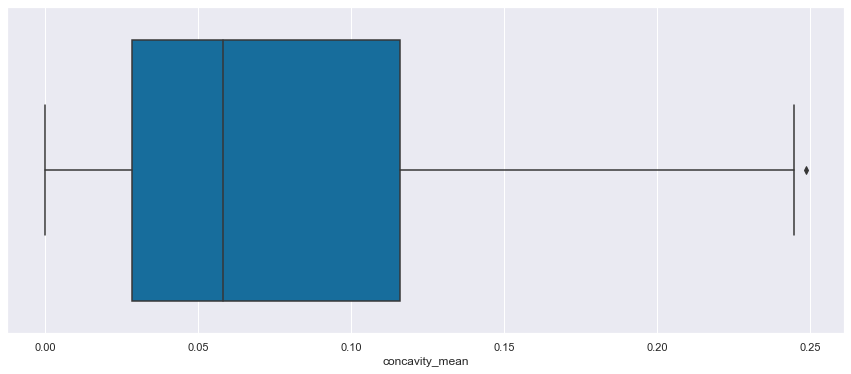

In [29]:
sns.boxplot(x=train['concavity_mean'])

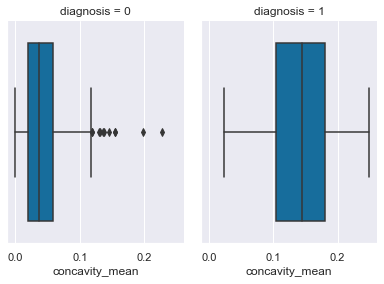

In [30]:
sns.catplot(x="concavity_mean",
                col="diagnosis",
                data=train, kind="box",
                height=4, aspect=.7);

### c) perimeter_worst

<AxesSubplot:xlabel='perimeter_worst'>

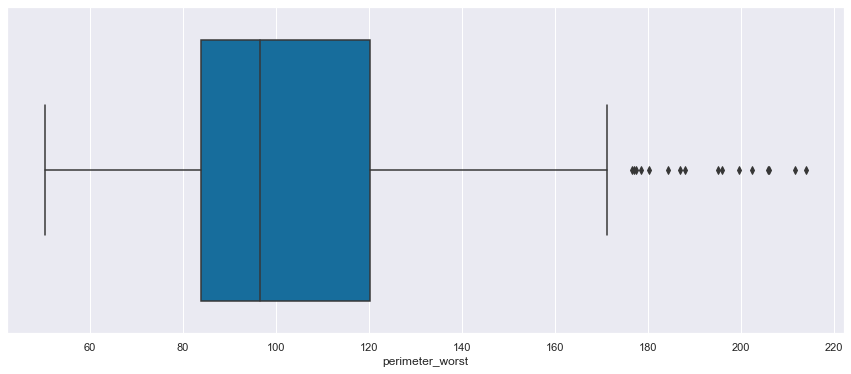

In [31]:
sns.boxplot(x=train['perimeter_worst'])

We can see there are 2 outliers. Lets remove them >120

In [32]:
outlier=train[train['perimeter_worst']>=165]
outlier

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
18,1,19.81,130.0,1260.0,0.1479,0.09498,0.7582,112.40,27.32,30.88,186.8,2398.0,0.3150,0.5372,0.2388
23,1,21.16,137.2,1404.0,0.1097,0.08632,0.6917,93.99,29.17,35.59,188.0,2615.0,0.2600,0.3155,0.2009
24,1,16.65,110.0,904.6,0.1525,0.09170,0.8068,102.60,26.46,31.56,177.0,2215.0,0.3578,0.4695,0.2095
42,1,19.07,128.3,1104.0,0.2107,0.09961,0.9811,104.90,24.09,33.17,177.4,1651.0,0.7444,0.7242,0.2493
56,1,19.21,125.5,1152.0,0.1323,0.08994,0.7275,102.50,26.14,28.14,170.1,2145.0,0.3511,0.3879,0.2091
70,1,18.94,123.6,1130.0,0.1080,0.07951,0.7888,96.05,24.86,26.58,165.9,1866.0,0.2336,0.2687,0.1789
164,1,23.27,152.1,1686.0,0.1324,0.09702,0.6642,97.85,28.01,28.22,184.2,2403.0,0.3583,0.3948,0.2346
181,1,21.09,142.7,1311.0,0.2487,0.14960,0.6298,81.46,26.68,33.48,176.5,2089.0,0.7584,0.6780,0.2903
198,1,19.18,127.5,1148.0,0.1114,0.06772,0.4357,54.22,23.36,32.06,166.4,1688.0,0.5601,0.3865,0.1708
218,1,19.80,129.7,1230.0,0.1272,0.08691,0.9553,124.40,25.73,28.64,170.3,2009.0,0.3235,0.3617,0.1820


In [33]:
train = train[train['perimeter_worst']<165]
train

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
1,1,20.57,132.90,1326.0,0.08690,0.07017,0.5435,74.08,24.990,23.41,158.80,1956.0,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.19740,0.12790,0.7456,94.03,23.570,25.53,152.50,1709.0,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.24140,0.10520,0.4956,27.23,14.910,26.50,98.87,567.7,0.86630,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.19800,0.10430,0.7572,94.44,22.540,16.67,152.20,1575.0,0.20500,0.4000,0.1625
5,1,12.45,82.57,477.1,0.15780,0.08089,0.3345,27.19,15.470,23.75,103.40,741.6,0.52490,0.5355,0.1741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,0,14.05,91.38,600.4,0.04462,0.04304,0.3645,29.84,15.300,33.17,100.20,706.7,0.22640,0.1326,0.1048
561,0,11.20,70.67,386.0,0.00000,0.00000,0.3141,22.81,11.920,38.30,75.19,439.6,0.05494,0.0000,0.0000
565,1,20.13,131.20,1261.0,0.14400,0.09791,0.7655,99.04,23.690,38.25,155.00,1731.0,0.19220,0.3215,0.1628
566,1,16.60,108.30,858.1,0.09251,0.05302,0.4564,48.55,18.980,34.12,126.70,1124.0,0.30940,0.3403,0.1418


<AxesSubplot:xlabel='perimeter_worst'>

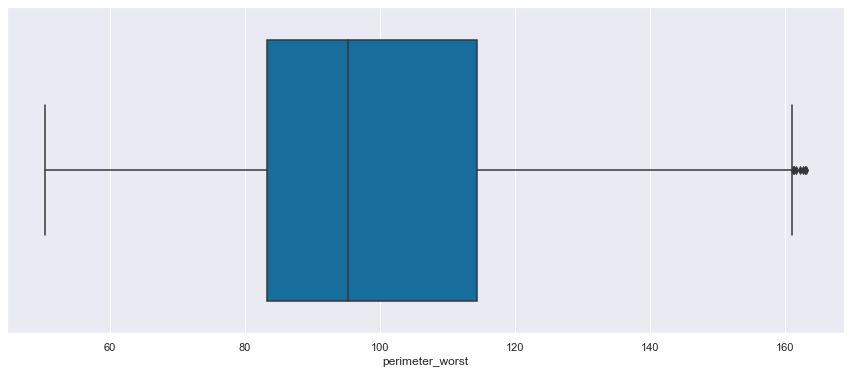

In [34]:
sns.boxplot(x=train['perimeter_worst'])

## Machine Learning Application

### Split Data

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [36]:
x=train.drop('diagnosis',axis=1)
y=train.diagnosis

In [37]:
print(x.shape)
print(y.shape)

(520, 14)
(520,)


In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

### Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### a) Logistic Regression

In [40]:
# Making Confusion Matrix and calculating accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)

mylist.append(acc_logreg)
print(cm)
print(acc_logreg,'%')

[[95  3]
 [ 7 51]]
0.9358974358974359 %


### b) KNN

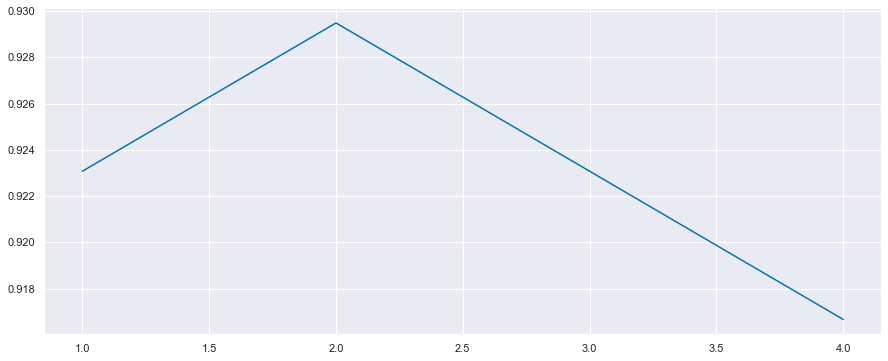

In [41]:
# Finding the optimum number of neighbors 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(1,5):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(1,5)), list1)
plt.show()

In [42]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

# Predicting the Test set results

y_pred = classifier.predict(x_test)
print(y_pred)



[0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 1 1]


In [64]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)
mylist.append(acc_knn)
print(cm)
print(acc_knn)

[[96  2]
 [ 8 50]]
0.9358974358974359


### c) Support Vector Machines

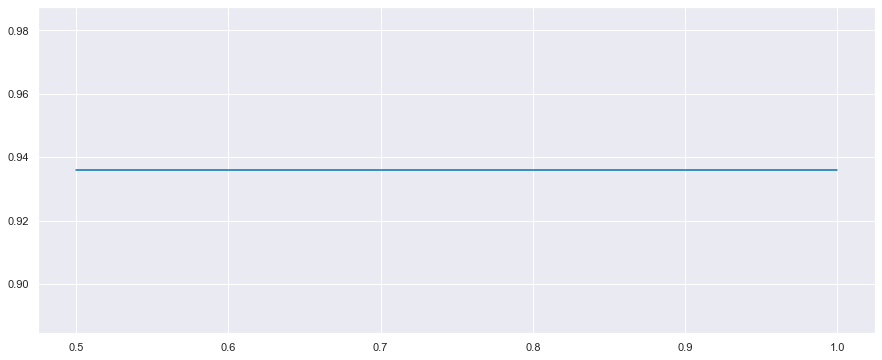

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

In [66]:
# Training the Support Vector Classifier on the Training set

from sklearn.svm import SVC
classifier = SVC(C = 0.9, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)



SVC(C=0.9, random_state=0)

In [67]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0
 1 0 0 0 1 0 1 1]


In [68]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_svc = accuracy_score(y_test, y_pred)
print(cm)
print(acc_svc,'%')
mylist.append(acc_svc)

[[94  4]
 [ 6 52]]
0.9358974358974359 %


### d) DecisionTreeClassifier

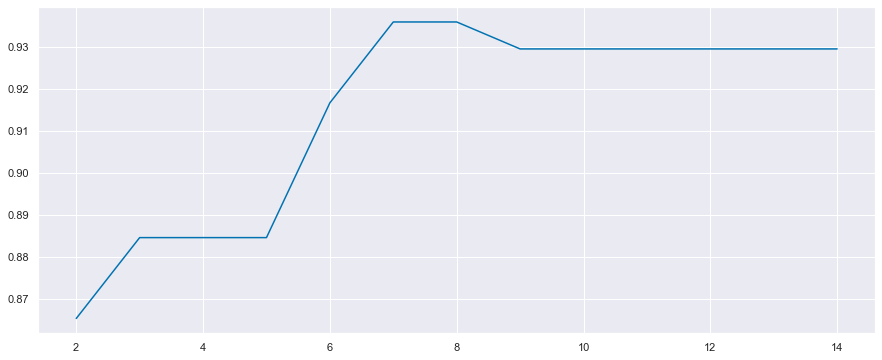

In [69]:
# Finding the optimum number of max_leaf_nodes

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,15)), list1)
plt.show()

In [70]:
# Training the Decision Tree Classifier on the Training set

classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)

In [71]:
#Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 1]


In [72]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_decisiontree = accuracy_score(y_test, y_pred)
print(cm)
print(acc_decisiontree)
mylist.append(acc_decisiontree)

[[91  7]
 [11 47]]
0.8846153846153846


### e) Random Forest Classification

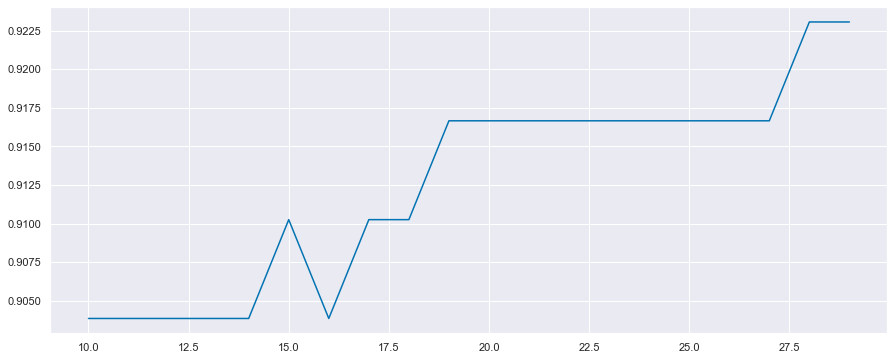

In [73]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [74]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [75]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 1 0 1 1]


In [76]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest)

[[92  6]
 [ 8 50]]
0.9102564102564102


### f) catboost

In [77]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(x_train, y_train)

Learning rate set to 0.006692
0:	learn: 0.6806293	total: 46.4ms	remaining: 46.3s
1:	learn: 0.6690496	total: 62.6ms	remaining: 31.2s
2:	learn: 0.6569523	total: 79.1ms	remaining: 26.3s
3:	learn: 0.6449556	total: 94.9ms	remaining: 23.6s
4:	learn: 0.6346214	total: 111ms	remaining: 22.2s
5:	learn: 0.6243717	total: 128ms	remaining: 21.2s
6:	learn: 0.6124366	total: 144ms	remaining: 20.4s
7:	learn: 0.6020702	total: 160ms	remaining: 19.9s
8:	learn: 0.5919894	total: 181ms	remaining: 19.9s
9:	learn: 0.5809466	total: 202ms	remaining: 20s
10:	learn: 0.5716404	total: 225ms	remaining: 20.2s
11:	learn: 0.5604059	total: 244ms	remaining: 20.1s
12:	learn: 0.5509066	total: 262ms	remaining: 19.9s
13:	learn: 0.5427798	total: 278ms	remaining: 19.6s
14:	learn: 0.5338009	total: 305ms	remaining: 20s
15:	learn: 0.5238749	total: 322ms	remaining: 19.8s
16:	learn: 0.5150491	total: 339ms	remaining: 19.6s
17:	learn: 0.5064750	total: 355ms	remaining: 19.4s
18:	learn: 0.4995354	total: 378ms	remaining: 19.5s
19:	learn: 

170:	learn: 0.0814745	total: 3.23s	remaining: 15.7s
171:	learn: 0.0808605	total: 3.25s	remaining: 15.6s
172:	learn: 0.0801178	total: 3.26s	remaining: 15.6s
173:	learn: 0.0793735	total: 3.27s	remaining: 15.5s
174:	learn: 0.0787530	total: 3.29s	remaining: 15.5s
175:	learn: 0.0781357	total: 3.3s	remaining: 15.5s
176:	learn: 0.0776445	total: 3.32s	remaining: 15.4s
177:	learn: 0.0771257	total: 3.33s	remaining: 15.4s
178:	learn: 0.0764292	total: 3.34s	remaining: 15.3s
179:	learn: 0.0757891	total: 3.35s	remaining: 15.3s
180:	learn: 0.0751978	total: 3.37s	remaining: 15.2s
181:	learn: 0.0745147	total: 3.38s	remaining: 15.2s
182:	learn: 0.0738576	total: 3.39s	remaining: 15.1s
183:	learn: 0.0732764	total: 3.4s	remaining: 15.1s
184:	learn: 0.0725715	total: 3.42s	remaining: 15s
185:	learn: 0.0719720	total: 3.43s	remaining: 15s
186:	learn: 0.0713984	total: 3.45s	remaining: 15s
187:	learn: 0.0709857	total: 3.46s	remaining: 15s
188:	learn: 0.0705528	total: 3.48s	remaining: 14.9s
189:	learn: 0.0700541	

331:	learn: 0.0315589	total: 5.2s	remaining: 10.5s
332:	learn: 0.0314039	total: 5.21s	remaining: 10.4s
333:	learn: 0.0312654	total: 5.22s	remaining: 10.4s
334:	learn: 0.0311024	total: 5.23s	remaining: 10.4s
335:	learn: 0.0309858	total: 5.24s	remaining: 10.4s
336:	learn: 0.0308269	total: 5.25s	remaining: 10.3s
337:	learn: 0.0307360	total: 5.26s	remaining: 10.3s
338:	learn: 0.0306049	total: 5.27s	remaining: 10.3s
339:	learn: 0.0304501	total: 5.28s	remaining: 10.3s
340:	learn: 0.0303297	total: 5.29s	remaining: 10.2s
341:	learn: 0.0301919	total: 5.3s	remaining: 10.2s
342:	learn: 0.0300493	total: 5.31s	remaining: 10.2s
343:	learn: 0.0299300	total: 5.32s	remaining: 10.1s
344:	learn: 0.0297957	total: 5.33s	remaining: 10.1s
345:	learn: 0.0296386	total: 5.34s	remaining: 10.1s
346:	learn: 0.0295130	total: 5.35s	remaining: 10.1s
347:	learn: 0.0293841	total: 5.36s	remaining: 10s
348:	learn: 0.0292498	total: 5.37s	remaining: 10s
349:	learn: 0.0291191	total: 5.38s	remaining: 9.99s
350:	learn: 0.0289

502:	learn: 0.0170758	total: 6.87s	remaining: 6.79s
503:	learn: 0.0170111	total: 6.88s	remaining: 6.77s
504:	learn: 0.0169664	total: 6.89s	remaining: 6.75s
505:	learn: 0.0169128	total: 6.9s	remaining: 6.74s
506:	learn: 0.0168571	total: 6.91s	remaining: 6.72s
507:	learn: 0.0168207	total: 6.92s	remaining: 6.7s
508:	learn: 0.0167575	total: 6.93s	remaining: 6.69s
509:	learn: 0.0167199	total: 6.94s	remaining: 6.67s
510:	learn: 0.0166837	total: 6.95s	remaining: 6.65s
511:	learn: 0.0166368	total: 6.96s	remaining: 6.63s
512:	learn: 0.0166011	total: 6.97s	remaining: 6.61s
513:	learn: 0.0165530	total: 6.98s	remaining: 6.6s
514:	learn: 0.0164838	total: 6.99s	remaining: 6.58s
515:	learn: 0.0164757	total: 6.99s	remaining: 6.56s
516:	learn: 0.0164459	total: 7s	remaining: 6.54s
517:	learn: 0.0164091	total: 7.01s	remaining: 6.53s
518:	learn: 0.0163371	total: 7.02s	remaining: 6.51s
519:	learn: 0.0162773	total: 7.03s	remaining: 6.49s
520:	learn: 0.0162338	total: 7.04s	remaining: 6.47s
521:	learn: 0.0161

661:	learn: 0.0114677	total: 8.4s	remaining: 4.29s
662:	learn: 0.0114351	total: 8.41s	remaining: 4.27s
663:	learn: 0.0114034	total: 8.42s	remaining: 4.26s
664:	learn: 0.0113843	total: 8.43s	remaining: 4.25s
665:	learn: 0.0113575	total: 8.44s	remaining: 4.23s
666:	learn: 0.0113329	total: 8.45s	remaining: 4.22s
667:	learn: 0.0113052	total: 8.46s	remaining: 4.21s
668:	learn: 0.0112811	total: 8.47s	remaining: 4.19s
669:	learn: 0.0112643	total: 8.48s	remaining: 4.18s
670:	learn: 0.0112393	total: 8.49s	remaining: 4.16s
671:	learn: 0.0112069	total: 8.5s	remaining: 4.15s
672:	learn: 0.0111785	total: 8.51s	remaining: 4.13s
673:	learn: 0.0111564	total: 8.52s	remaining: 4.12s
674:	learn: 0.0111364	total: 8.53s	remaining: 4.11s
675:	learn: 0.0111012	total: 8.54s	remaining: 4.09s
676:	learn: 0.0110760	total: 8.55s	remaining: 4.08s
677:	learn: 0.0110457	total: 8.56s	remaining: 4.06s
678:	learn: 0.0110239	total: 8.57s	remaining: 4.05s
679:	learn: 0.0110092	total: 8.57s	remaining: 4.04s
680:	learn: 0.

826:	learn: 0.0082544	total: 10s	remaining: 2.1s
827:	learn: 0.0082420	total: 10.1s	remaining: 2.09s
828:	learn: 0.0082301	total: 10.1s	remaining: 2.08s
829:	learn: 0.0082216	total: 10.1s	remaining: 2.06s
830:	learn: 0.0082197	total: 10.1s	remaining: 2.05s
831:	learn: 0.0082013	total: 10.1s	remaining: 2.04s
832:	learn: 0.0081856	total: 10.1s	remaining: 2.02s
833:	learn: 0.0081756	total: 10.1s	remaining: 2.01s
834:	learn: 0.0081585	total: 10.1s	remaining: 2s
835:	learn: 0.0081371	total: 10.1s	remaining: 1.99s
836:	learn: 0.0081205	total: 10.1s	remaining: 1.97s
837:	learn: 0.0081024	total: 10.1s	remaining: 1.96s
838:	learn: 0.0080842	total: 10.2s	remaining: 1.95s
839:	learn: 0.0080719	total: 10.2s	remaining: 1.94s
840:	learn: 0.0080578	total: 10.2s	remaining: 1.92s
841:	learn: 0.0080415	total: 10.2s	remaining: 1.91s
842:	learn: 0.0080351	total: 10.2s	remaining: 1.9s
843:	learn: 0.0080184	total: 10.2s	remaining: 1.88s
844:	learn: 0.0080000	total: 10.2s	remaining: 1.87s
845:	learn: 0.00797

992:	learn: 0.0063777	total: 11.5s	remaining: 81ms
993:	learn: 0.0063655	total: 11.5s	remaining: 69.4ms
994:	learn: 0.0063650	total: 11.5s	remaining: 57.8ms
995:	learn: 0.0063643	total: 11.5s	remaining: 46.3ms
996:	learn: 0.0063567	total: 11.5s	remaining: 34.7ms
997:	learn: 0.0063484	total: 11.5s	remaining: 23.1ms
998:	learn: 0.0063374	total: 11.5s	remaining: 11.6ms
999:	learn: 0.0063368	total: 11.6s	remaining: 0us


In [78]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 1]


In [79]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac_catboost = accuracy_score(y_test, y_pred)
mylist.append(ac_catboost)
print(cm)
print(ac_catboost)

[[96  2]
 [ 8 50]]
0.9358974358974359


In [81]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest',   
              'Decision Tree','catboost'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_decisiontree,ac_catboost
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.935897
1,KNN,0.935897
2,Logistic Regression,0.935897
5,catboost,0.935897
3,Random Forest,0.910256
4,Decision Tree,0.884615


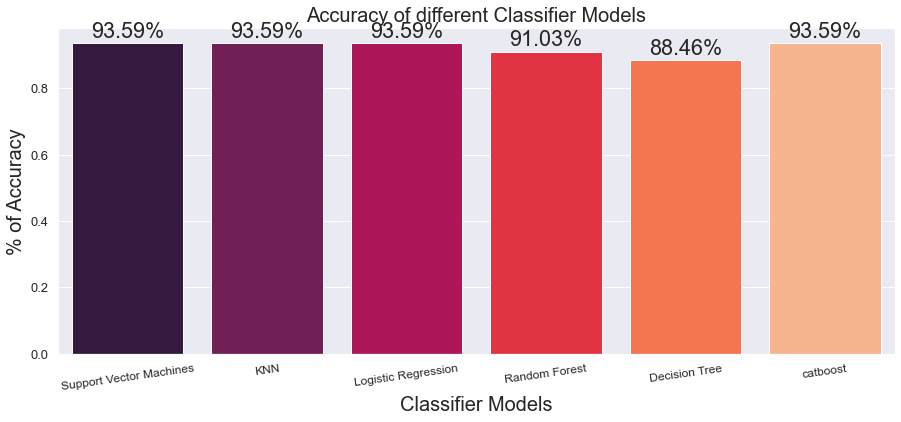

In [82]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()